### 10-1. ÌîÑÎ°úÏ†ùÌä∏: ÌïúÍµ≠Ïñ¥ Îç∞Ïù¥ÌÑ∞Î°ú Ï±óÎ¥á ÎßåÎì§Í∏∞
ÏòÅÏñ¥Î°ú ÎßåÎì§ÏóàÎçò Ï±óÎ¥áÏùÑ ÌïúÍµ≠Ïñ¥ Îç∞Ïù¥ÌÑ∞Î°ú Î∞îÍøîÏÑú ÌõàÎ†®ÏãúÏºúÎ¥ÖÏãúÎã§.

ÏãúÏûëÌïòÍ∏∞ Ï†ÑÏóê Ïö∞ÏÑ† Ï£ºÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Î≤ÑÏ†ÑÏùÑ ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§.

In [5]:
import tensorflow

print(tensorflow.__version__)

2.6.0


#### Step 1. Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÌïòÍ∏∞
___
ÌïúÍµ≠Ïñ¥ Ï±óÎ¥á Îç∞Ïù¥ÌÑ∞Îäî ÏÜ°ÏòÅÏàôÎãòÏù¥ Í≥µÍ∞úÌïú Ï±óÎ¥á Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.

Ïù¥ Îç∞Ïù¥ÌÑ∞Îäî ÏïÑÎûòÏùò ÎßÅÌÅ¨ÏóêÏÑú Îã§Ïö¥Î°úÎìúÌï† Ïàò ÏûàÏäµÎãàÎã§.

- [songys/Chatbot_data](https://github.com/songys/Chatbot_data/blob/master/ChatbotData.csv)  

```Cloud shell```ÏóêÏÑú ÏïÑÎûò Î™ÖÎ†πÏñ¥Î•º ÏûÖÎ†•Ìï¥ Ï£ºÏÑ∏Ïöî.

```
$ mkdir -p ~/aiffel/transformer_chatbot/data/
$ ln -s ~/data/* ~/aiffel/transformer_chatbot/data/
```

#### Step 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ÌïòÍ∏∞
___
ÏòÅÏñ¥ Îç∞Ïù¥ÌÑ∞ÏôÄÎäî Ï†ÑÌòÄ Îã§Î•∏ Îç∞Ïù¥ÌÑ∞Ïù∏ ÎßåÌÅº ÏòÅÏñ¥ Îç∞Ïù¥ÌÑ∞Ïóê ÏÇ¨Ïö©ÌñàÎçò Ï†ÑÏ≤òÎ¶¨ÏôÄ ÏùºÎ∂Ä ÎèôÏùºÌïú Ï†ÑÏ≤òÎ¶¨ÎèÑ ÌïÑÏöîÌïòÍ≤†ÏßÄÎßå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°úÎäî Îã§Î•∏ Ï†ÑÏ≤òÎ¶¨Î•º ÏàòÌñâÌï¥Ïïº Ìï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
print("Ïäù=3")

# path_to_zip = tf.keras.utils.get_file(
#     'cornell_movie_dialogs.zip',
#     origin='http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',
#     extract=True)

# path_to_dataset = os.path.join(
#     os.path.dirname(path_to_zip), "cornell movie-dialogs corpus")

# path_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')
# path_to_movie_conversations = os.path.join(path_to_dataset,'movie_conversations.txt')
# print("Ïäù=3")
path_to_csv = tf.keras.utils.get_file(
    'ChatbotData.csv',
    origin='https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv',
    extract=False)

# path_to_dataset = os.path.dirname(path_to_csv)
path_to_chatbot_data = path_to_csv  # Îã®Ïùº CSV ÌååÏùºÏù¥ÎØÄÎ°ú Í≤ΩÎ°úÍ∞Ä ÎèôÏùº

print("Ïäù=3")
import pandas as pd

# CSV ÌååÏùº ÏùΩÏñ¥ÏÑú ÌôïÏù∏
chatbot_data = pd.read_csv(path_to_chatbot_data)
chatbot_data

# ÏÇ¨Ïö©Ìï† ÏÉòÌîåÏùò ÏµúÎåÄ Í∞úÏàò
MAX_SAMPLES = 10000
print(MAX_SAMPLES)

# # Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
# def preprocess_sentence(sentence):
#   # ÏûÖÎ†•Î∞õÏùÄ sentenceÎ•º ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÍ≤ΩÌïòÍ≥† ÏñëÏ™Ω Í≥µÎ∞±ÏùÑ Ï†úÍ±∞
#   sentence = sentence.lower().strip()# [[YOUR CODE]]

#   # Îã®Ïñ¥ÏôÄ Íµ¨ÎëêÏ†ê(punctuation) ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
#   # ÏòàÎ•º Îì§Ïñ¥ÏÑú "I am a student." => "I am a student ."ÏôÄ Í∞ôÏù¥
#   # studentÏôÄ Ïò®Ï†ê ÏÇ¨Ïù¥Ïóê Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
#   sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
#   sentence = re.sub(r'[" "]+', " ", sentence)

#   # (a-z, A-Z, ".", "?", "!", ",")Î•º Ï†úÏô∏Ìïú Î™®Îì† Î¨∏ÏûêÎ•º Í≥µÎ∞±Ïù∏ ' 'Î°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.
#   sentence = re.sub(r'[^a-zA-Z.?!,]+', " ", sentence)# [[YOUR CODE]]
#   sentence = sentence.strip()
#   return sentence
# print("Ïäù=3")
# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def preprocess_sentence(sentence):
  # ÏûÖÎ†•Î∞õÏùÄ sentenceÏùò ÏñëÏ™Ω Í≥µÎ∞±ÏùÑ Ï†úÍ±∞
  sentence = sentence.strip()
  
  # Îã®Ïñ¥ÏôÄ Íµ¨ÎëêÏ†ê ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)
  
  # ÌïúÍ∏Ä, ÏòÅÎ¨∏Ïûê, Íµ¨ÎëêÏ†êÏùÑ Ï†úÏô∏Ìïú Î™®Îì† Î¨∏ÏûêÎ•º Í≥µÎ∞±ÏúºÎ°ú ÎåÄÏ≤¥
  sentence = re.sub(r'[^Í∞Ä-Ìû£a-zA-Z.?!,]+', " ", sentence)
  sentence = sentence.strip()
  return sentence
print("Ïäù=3")

# # ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Íµ¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ìï®Ïàò
# def load_conversations():
#   id2line = {}
#   with open(path_to_movie_lines, errors='ignore') as file:
#     lines = file.readlines()
#   for line in lines:
#     parts = line.replace('\n', '').split(' +++$+++ ')
#     id2line[parts[0]] = parts[4]

#   inputs, outputs = [], []
#   with open(path_to_movie_conversations, 'r') as file:
#     lines = file.readlines()

#   for line in lines:
#     parts = line.replace('\n', '').split(' +++$+++ ')
#     conversation = [line[1:-1] for line in parts[3][1:-1].split(', ')]

#     for i in range(len(conversation) - 1):
#       # Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º ÏßàÎ¨∏Ïóê Ìï¥ÎãπÎêòÎäî inputsÏôÄ ÎãµÎ≥ÄÏóê Ìï¥ÎãπÎêòÎäî outputsÏóê Ï†ÅÏö©.
#       inputs.append(preprocess_sentence(id2line[conversation[i]]))
#       outputs.append(preprocess_sentence(id2line[conversation[i + 1]]))

#       if len(inputs) >= MAX_SAMPLES:
#         return inputs, outputs
#   return inputs, outputs
# print("Ïäù=3")
# ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Íµ¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ìï®Ïàò
def load_conversations():
  inputs, outputs = [], []
  
#   # CSV ÌååÏùº ÏùΩÍ∏∞
#   chatbot_data = pd.read_csv(path_to_chatbot_data)
  
  # Í∞Å ÌñâÏùò ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùÑ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
  for idx, row in chatbot_data.iterrows():
    # Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º ÏßàÎ¨∏Ïóê Ìï¥ÎãπÎêòÎäî inputsÏôÄ ÎãµÎ≥ÄÏóê Ìï¥ÎãπÎêòÎäî outputsÏóê Ï†ÅÏö©
    inputs.append(preprocess_sentence(row['Q']))
    outputs.append(preprocess_sentence(row['A']))
    
    if len(inputs) >= MAX_SAMPLES:
      return inputs, outputs
  
  return inputs, outputs

print("Ïäù=3")

# Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥† Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ ÏßàÎ¨∏ÏùÑ questions, ÎãµÎ≥ÄÏùÑ answersÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.
questions, answers = load_conversations()
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(questions))
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(answers))

print('Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: {}'.format(questions[21]))
print('Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: {}'.format(answers[21]))

Ïäù=3
Ïäù=3
10000
Ïäù=3
Ïäù=3
Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 10000
Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 10000
Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: Í∞ÄÏä§ÎπÑ Ïû•ÎÇú ÏïÑÎãò
Ï†ÑÏ≤òÎ¶¨ ÌõÑÏùò 22Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: Îã§Ïùå Îã¨ÏóêÎäî Îçî Ï†àÏïΩÌï¥Î¥êÏöî .


#### Step 3. SubwordTextEncoder ÏÇ¨Ïö©ÌïòÍ∏∞
___
ÌïúÍµ≠Ïñ¥ Îç∞Ïù¥ÌÑ∞Îäî ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÏùÑ Ìï¥Ïïº ÌïúÎã§Í≥† ÎßéÏùÄ Î∂ÑÏù¥ ÏïåÍ≥† ÏûàÏäµÎãàÎã§. ÌïòÏßÄÎßå Ïó¨Í∏∞ÏÑúÎäî ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Í∞Ä ÏïÑÎãå ÏúÑ Ïã§ÏäµÏóêÏÑú ÏÇ¨Ïö©ÌñàÎçò ÎÇ¥Î∂Ä Îã®Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏù∏ ```SubwordTextEncoder```Î•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï¥Î≥¥ÏÑ∏Ïöî.

In [9]:
import tensorflow_datasets as tfds
print("ÏÇ¥Ïßù Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏñ¥Ïöî. Ïä§Ìä∏Î†àÏπ≠ Ìïú Î≤à Ìï¥Î≥ºÍπåÏöî? üëê")

# ÏßàÎ¨∏Í≥º ÎãµÎ≥Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ÏÑú Vocabulary ÏÉùÏÑ±
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("Ïäù=3 ")

# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïóê Í≥†Ïú†Ìïú Ï†ïÏàòÎ•º Î∂ÄÏó¨Ìï©ÎãàÎã§.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("Ïäù=3")

print('START_TOKENÏùò Î≤àÌò∏ :' ,[tokenizer.vocab_size])
print('END_TOKENÏùò Î≤àÌò∏ :' ,[tokenizer.vocab_size + 1])

# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Í≥†Î†§ÌïòÏó¨ +2Î•º ÌïòÏó¨ Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞Î•º ÏÇ∞Ï†ïÌï©ÎãàÎã§.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

ÏÇ¥Ïßù Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏñ¥Ïöî. Ïä§Ìä∏Î†àÏπ≠ Ìïú Î≤à Ìï¥Î≥ºÍπåÏöî? üëê
Ïäù=3 
Ïäù=3
START_TOKENÏùò Î≤àÌò∏ : [8815]
END_TOKENÏùò Î≤àÌò∏ : [8816]
8817


In [10]:
# ÏûÑÏùòÏùò 22Î≤àÏß∏ ÏÉòÌîåÏóê ÎåÄÌï¥ÏÑú Ï†ïÏàò Ïù∏ÏΩîÎî© ÏûëÏóÖÏùÑ ÏàòÌñâ.
# Í∞Å ÌÜ†ÌÅ∞ÏùÑ Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Î≥ÄÌôò
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: {}'.format(tokenizer.encode(questions[21])))
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: {}'.format(tokenizer.encode(answers[21])))

# ÏÉòÌîåÏùò ÏµúÎåÄ ÌóàÏö© Í∏∏Ïù¥ ÎòêÎäî Ìå®Îî© ÌõÑÏùò ÏµúÏ¢Ö Í∏∏Ïù¥
MAX_LENGTH = 40
print(MAX_LENGTH)

# Ï†ïÏàò Ïù∏ÏΩîÎî©, ÏµúÎåÄ Í∏∏Ïù¥Î•º Ï¥àÍ≥ºÌïòÎäî ÏÉòÌîå Ï†úÍ±∞, Ìå®Îî©
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # Ï†ïÏàò Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏóêÏÑú ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Ï∂îÍ∞Ä
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # ÏµúÎåÄ Í∏∏Ïù¥ 40 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ÏóêÎßå Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌóàÏö©
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # ÏµúÎåÄ Í∏∏Ïù¥ 40ÏúºÎ°ú Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ìå®Îî©
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs
print("Ïäù=3")

questions, answers = tokenize_and_filter(questions, answers)
print('Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ :',(VOCAB_SIZE))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: {}'.format(len(questions)))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: {}'.format(len(answers)))

Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: [8533, 3642, 7119]
Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: [1763, 5683, 7, 4724, 115, 1]
40
Ïäù=3
Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ : 8817
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: 10000
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: 10000


In [11]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# ÎîîÏΩîÎçîÎäî Ïù¥Ï†ÑÏùò targetÏùÑ Îã§ÏùåÏùò inputÏúºÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# Ïù¥Ïóê Îî∞Îùº outputsÏóêÏÑúÎäî START_TOKENÏùÑ Ï†úÍ±∞ÌïòÍ≤†ÏäµÎãàÎã§.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("Ïäù=3")

Ïäù=3


#### Step 4. Î™®Îç∏ Íµ¨ÏÑ±ÌïòÍ∏∞
___
ÏúÑ Ïã§Ïäµ ÎÇ¥Ïö©ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Ìä∏ÎûúÏä§Ìè¨Î®∏ Î™®Îç∏ÏùÑ Íµ¨ÌòÑÌï©ÎãàÎã§.

Ïäù=3


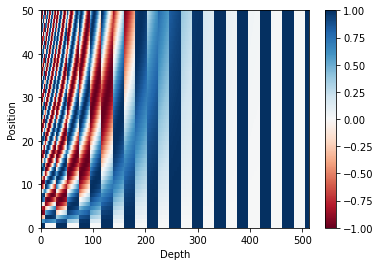

Ïäù=3
Ïäù=3
Ïäù=3
Ïäù=3
Ïäù=3
Ïäù=3
Ïäù=3
Ïäù=3


In [12]:
# Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # Í∞ÅÎèÑ Î∞∞Ïó¥ ÏÉùÏÑ±
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # Î∞∞Ïó¥Ïùò ÏßùÏàò Ïù∏Îç±Ïä§ÏóêÎäî sin Ìï®Ïàò Ï†ÅÏö©
    sines = tf.math.sin(angle_rads[:, 0::2])
    # Î∞∞Ïó¥Ïùò ÌôÄÏàò Ïù∏Îç±Ïä§ÏóêÎäî cosine Ìï®Ïàò Ï†ÅÏö©
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sinÍ≥º cosineÏù¥ ÍµêÏ∞®ÎêòÎèÑÎ°ù Ïû¨Î∞∞Ïó¥
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("Ïäù=3")

sample_pos_encoding = PositionalEncoding(50, 512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

# Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
def scaled_dot_product_attention(query, key, value, mask):
  # Ïñ¥ÌÖêÏÖò Í∞ÄÏ§ëÏπòÎäî QÏôÄ KÏùò Îã∑ ÌîÑÎ°úÎçïÌä∏
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # Í∞ÄÏ§ëÏπòÎ•º Ï†ïÍ∑úÌôî
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # Ìå®Îî©Ïóê ÎßàÏä§ÌÅ¨ Ï∂îÍ∞Ä
  if mask is not None:
    logits += (mask * -1e9)

  # softmaxÏ†ÅÏö©
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # ÏµúÏ¢Ö Ïñ¥ÌÖêÏÖòÏùÄ Í∞ÄÏ§ëÏπòÏôÄ VÏùò Îã∑ ÌîÑÎ°úÎçïÌä∏
  output = tf.matmul(attention_weights, value)
  return output

print("Ïäù=3")

class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, VÏóê Í∞ÅÍ∞Å DenseÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # Î≥ëÎ†¨ Ïó∞ÏÇ∞ÏùÑ ÏúÑÌïú Î®∏Î¶¨Î•º Ïó¨Îü¨ Í∞ú ÎßåÎì≠ÎãàÎã§
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ ÌõÑÏóê Í∞Å Í≤∞Í≥ºÎ•º Îã§Ïãú Ïó∞Í≤∞(concatenate)Ìï©ÎãàÎã§
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # ÏµúÏ¢Ö Í≤∞Í≥ºÏóêÎèÑ DenseÎ•º Ìïú Î≤à Îçî Ï†ÅÏö©Ìï©ÎãàÎã§
    outputs = self.dense(concat_attention)

    return outputs
print("Ïäù=3")

def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]
print("Ïäù=3")
# print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)
print("Ïäù=3")
# print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))
# print(create_look_ahead_mask(tf.constant([[0, 5, 1, 5, 5]])))

# Ïù∏ÏΩîÎçî ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥Î•º Ìï®ÏàòÎ°ú Íµ¨ÌòÑ.
# Ïù¥ ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ ÏïàÏóêÎäî Îëê Í∞úÏùò ÏÑúÎ∏å Î†àÏù¥Ïñ¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÇ¨Ïö©
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º Layer NormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("Ïäù=3")

def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÇ¨Ïö©
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
  max_position = 100
  embeddings = PositionalEncoding(max_position, d_model)(embeddings)#  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layersÎßåÌÅº ÏåìÏïÑÏò¨Î¶∞ Ïù∏ÏΩîÎçîÏùò Ï∏µ.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("Ïäù=3")

# ÎîîÏΩîÎçî ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥Î•º Ìï®ÏàòÎ°ú Íµ¨ÌòÑ.
# Ïù¥ ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ ÏïàÏóêÎäî ÏÑ∏ Í∞úÏùò ÏÑúÎ∏å Î†àÏù¥Ïñ¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : ÎßàÏä§ÌÅ¨Îìú Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ(+ ÏûîÏ∞® Ïó∞Í≤∞(residual connection))
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò ÏàòÌñâ
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî
  # DropoutÍ≥º LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ(+ ÏûîÏ∞® Ïó∞Í≤∞)
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ(ÌîºÎìúÌè¨ÏõåÎìú Ïã†Í≤ΩÎßù)Ïùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalization ÏàòÌñâ
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("Ïäù=3")

def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # Ìå®Îî© ÎßàÏä§ÌÅ¨
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
  max_position = 100
  embeddings = PositionalEncoding(max_position, d_model)(embeddings)#   embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # DropoutÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("Ïäù=3")

Ïäù=3
Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3311360     inputs[0][0]                     
                                                                 enc_padding_mask[

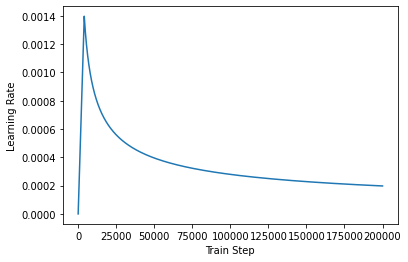

In [13]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # Ïù∏ÏΩîÎçîÏóêÏÑú Ìå®Îî©ÏùÑ ÏúÑÌïú ÎßàÏä§ÌÅ¨
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # ÎîîÏΩîÎçîÏóêÏÑú ÎØ∏ÎûòÏùò ÌÜ†ÌÅ∞ÏùÑ ÎßàÏä§ÌÅ¨ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
  # ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Ìå®Îî© ÎßàÏä§ÌÅ¨ÎèÑ Ìè¨Ìï®ÎêòÏñ¥Ï†∏ ÏûàÏäµÎãàÎã§.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # Îëê Î≤àÏß∏ Ïñ¥ÌÖêÏÖò Î∏îÎ°ùÏóêÏÑú Ïù∏ÏΩîÎçîÏùò Î≤°ÌÑ∞Îì§ÏùÑ ÎßàÏä§ÌÇπ
  # ÎîîÏΩîÎçîÏóêÏÑú Ìå®Îî©ÏùÑ ÏúÑÌïú ÎßàÏä§ÌÅ¨
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # Ïù∏ÏΩîÎçî
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # ÎîîÏΩîÎçî
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("Ïäù=3")

tf.keras.backend.clear_session()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
NUM_LAYERS = 2 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò Ï∏µÏùò Í∞úÏàò
D_MODEL = 256 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏùò ÏûÖ, Ï∂úÎ†•Ïùò Í≥†Ï†ï Ï∞®Ïõê
NUM_HEADS = 8 # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóêÏÑúÏùò Ìó§Îìú Ïàò 
UNITS = 512 # ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏùò ÏùÄÎãâÏ∏µÏùò ÌÅ¨Í∏∞
DROPOUT = 0.1 # ÎìúÎ°≠ÏïÑÏõÉÏùò ÎπÑÏú®

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)
print("Ïäù=3")

class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("Ïäù=3")

sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("Ïäù=3")

EPOCHS = 10
history1 = model.fit(dataset, epochs=EPOCHS, verbose=1)# model.fit(dataset, epochs=EPOCHS, verbose=1)

#### Step 5. Î™®Îç∏ ÌèâÍ∞ÄÌïòÍ∏∞
___
Step 1ÏóêÏÑú ÏÑ†ÌÉùÌïú Ï†ÑÏ≤òÎ¶¨ Î∞©Î≤ïÏùÑ Í≥†Î†§ÌïòÏó¨ ÏûÖÎ†•Îêú Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú ÎåÄÎãµÏùÑ ÏñªÎäî ÏòàÏ∏° Ìï®ÏàòÎ•º ÎßåÎì≠ÎãàÎã§.

In [14]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # ÏûÖÎ†•Îêú Î¨∏Ïû•ÏùÑ Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑ, ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ ÏïûÎí§Î°ú Ï∂îÍ∞Ä.
  # ex) Where have you been? ‚Üí [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # ÎîîÏΩîÎçîÏùò ÌòÑÏû¨ÍπåÏßÄÏùò ÏòàÏ∏°Ìïú Ï∂úÎ†• ÏãúÌÄÄÏä§Í∞Ä ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÎäî Î≥ÄÏàò.
  # Ï≤òÏùåÏóêÎäî ÏòàÏ∏°Ìïú ÎÇ¥Ïö©Ïù¥ ÏóÜÏùåÏúºÎ°ú ÏãúÏûë ÌÜ†ÌÅ∞Îßå Î≥ÑÎèÑ Ï†ÄÏû•. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # ÎîîÏΩîÎçîÏùò Ïù∏ÌçºÎü∞Ïä§ Îã®Í≥Ñ
  for i in range(MAX_LENGTH):
    # ÎîîÏΩîÎçîÎäî ÏµúÎåÄ MAX_LENGTHÏùò Í∏∏Ïù¥ÎßåÌÅº Îã§Ïùå Îã®Ïñ¥ ÏòàÏ∏°ÏùÑ Î∞òÎ≥µÌï©ÎãàÎã§.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Ïùò Ï†ïÏàò
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # ÎßåÏïΩ ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Í∞Ä Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïù¥ÎùºÎ©¥ forÎ¨∏ÏùÑ Ï¢ÖÎ£å
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # ÏòàÏ∏°Ìïú Îã®Ïñ¥Îì§ÏùÄ ÏßÄÏÜçÏ†ÅÏúºÎ°ú output_sequenceÏóê Ï∂îÍ∞ÄÎê©ÎãàÎã§.
    # Ïù¥ output_sequenceÎäî Îã§Ïãú ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Ïù¥ Îê©ÎãàÎã§.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)
print("Ïäù=3")

def sentence_generation(sentence):
  # ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú ÎîîÏΩîÎçîÎ•º ÎèôÏûë ÏãúÏºú ÏòàÏ∏°Îêú Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Î¶¨ÌÑ¥Î∞õÏäµÎãàÎã§.
  prediction = decoder_inference(sentence)

  # Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Îã§Ïãú ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('ÏûÖÎ†• : {}'.format(sentence))
  print('Ï∂úÎ†• : {}'.format(predicted_sentence))

  return predicted_sentence
print("Ïäù=3")

# sentence_generation('Where have you been?')
sentence_generation('ÎÑàÎäî Ïñ¥ÎîîÏóê ÏûàÏóàÏñ¥Ïöî?')

# sentence_generation("It's a trap")
sentence_generation("Í∑∏Í±¥ Ìï®Ï†ïÏù¥ÏóêÏöî.")

Ïäù=3
Ïäù=3
ÏûÖÎ†• : ÎÑàÎäî Ïñ¥ÎîîÏóê ÏûàÏóàÏñ¥Ïöî?
Ï∂úÎ†• : Îçî ÎßéÏù¥ ÎßåÎÇòÎ≥¥ÏÑ∏Ïöî .
ÏûÖÎ†• : Í∑∏Í±¥ Ìï®Ï†ïÏù¥ÏóêÏöî.
Ï∂úÎ†• : Ï†ÄÎèÑ Í∂ÅÍ∏àÌïòÎÑ§Ïöî .


'Ï†ÄÎèÑ Í∂ÅÍ∏àÌïòÎÑ§Ïöî .'

#### ÏÑ±Îä•‚Üë
1.ÎÖºÎ¨∏ ÌòïÏãù Îî∞Î•¥Í∏∞
---
- ÎÖºÎ¨∏ÏóêÏÑú num_layersÎäî 6, d-ModelÏùÄ 512ÏòÄÏßÄÎßå, Îπ†Î•¥Í≥† ÏõêÌôúÌïú ÌõàÎ†®ÏùÑ Î≤ÑÎ¶º
- Î™®Îç∏ ÏÉùÏÑ±Î∂ÄÌÑ∞ Îã§Ïãú

In [15]:
tf.keras.backend.clear_session()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
NUM_LAYERS = 6#2 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò Ï∏µÏùò Í∞úÏàò
D_MODEL = 512#256 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏùò ÏûÖ, Ï∂úÎ†•Ïùò Í≥†Ï†ï Ï∞®Ïõê
NUM_HEADS = 8 # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóêÏÑúÏùò Ìó§Îìú Ïàò 
UNITS = 512 # ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏùò ÏùÄÎãâÏ∏µÏùò ÌÅ¨Í∏∞
DROPOUT = 0.1 # ÎìúÎ°≠ÏïÑÏõÉÏùò ÎπÑÏú®

model2 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model2.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 512)    13982208    inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [16]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model2.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("Ïäù=3")

Ïäù=3


In [17]:
EPOCHS = 10
history2 = model2.fit(dataset, epochs=EPOCHS, verbose=1)# model2.fit(dataset, epochs=EPOCHS, verbose=1)

157/157 [==============================] - 52s 228ms/step - loss: 1.3012 - accuracy: 0.0230
Epoch 2/10
157/157 [==============================] - 36s 228ms/step - loss: 1.0564 - accuracy: 0.0458
Epoch 3/10
157/157 [==============================] - 35s 225ms/step - loss: 0.9483 - accuracy: 0.0499
Epoch 4/10
157/157 [==============================] - 36s 228ms/step - loss: 0.8996 - accuracy: 0.0513
Epoch 5/10
157/157 [==============================] - 36s 226ms/step - loss: 0.8697 - accuracy: 0.0530
Epoch 6/10
157/157 [==============================] - 36s 227ms/step - loss: 0.8408 - accuracy: 0.0547
Epoch 7/10
157/157 [==============================] - 36s 227ms/step - loss: 0.8064 - accuracy: 0.0571
Epoch 8/10
157/157 [==============================] - 36s 226ms/step - loss: 0.7642 - accuracy: 0.0598
Epoch 9/10
157/157 [==============================] - 36s 227ms/step - loss: 0.7123 - accuracy: 0.0637
Epoch 10/10
157/157 [==============================] - 36s 227ms/step - loss: 0.6566

#### ÏÑ±Îä•‚Üë
2.Í∏∞Ï°¥ epoch ÌöüÏàò ÎäòÎ¶¨Í∏∞
---
- Î™®Îç∏ ÏÉùÏÑ±Î∂ÄÌÑ∞ Îã§Ïãú
- 10 ‚Üí 100

In [18]:
tf.keras.backend.clear_session()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
NUM_LAYERS = 2 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò Ï∏µÏùò Í∞úÏàò
D_MODEL = 256 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏùò ÏûÖ, Ï∂úÎ†•Ïùò Í≥†Ï†ï Ï∞®Ïõê
NUM_HEADS = 8 # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóêÏÑúÏùò Ìó§Îìú Ïàò 
UNITS = 512 # ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏùò ÏùÄÎãâÏ∏µÏùò ÌÅ¨Í∏∞
DROPOUT = 0.1 # ÎìúÎ°≠ÏïÑÏõÉÏùò ÎπÑÏú®

model3 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model3.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3311360     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [19]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model3.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("Ïäù=3")

Ïäù=3


In [20]:
EPOCHS = 100
history3 = model3.fit(dataset, epochs=EPOCHS, verbose=1)# model3.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/100
157/157 [==============================] - 14s 57ms/step - loss: 1.4147 - accuracy: 0.0254
Epoch 2/100
157/157 [==============================] - 9s 57ms/step - loss: 1.1834 - accuracy: 0.0490
Epoch 3/100
157/157 [==============================] - 9s 57ms/step - loss: 0.9941 - accuracy: 0.0499
Epoch 4/100
157/157 [==============================] - 9s 57ms/step - loss: 0.9029 - accuracy: 0.0520
Epoch 5/100
157/157 [==============================] - 9s 57ms/step - loss: 0.8468 - accuracy: 0.0552
Epoch 6/100
157/157 [==============================] - 9s 57ms/step - loss: 0.7955 - accuracy: 0.0582
Epoch 7/100
157/157 [==============================] - 9s 57ms/step - loss: 0.7412 - accuracy: 0.0625
Epoch 8/100
157/157 [==============================] - 9s 57ms/step - loss: 0.6807 - accuracy: 0.0687
Epoch 9/100
157/157 [==============================] - 9s 57ms/step - loss: 0.6140 - accuracy: 0.0760
Epoch 10/100
157/157 [==============================] - 9s 57ms/step - loss: 0.54

157/157 [==============================] - 9s 57ms/step - loss: 0.0023 - accuracy: 0.1661
Epoch 81/100
157/157 [==============================] - 9s 57ms/step - loss: 0.0021 - accuracy: 0.1661
Epoch 82/100
157/157 [==============================] - 9s 57ms/step - loss: 0.0021 - accuracy: 0.1661
Epoch 83/100
157/157 [==============================] - 9s 57ms/step - loss: 0.0021 - accuracy: 0.1661
Epoch 84/100
157/157 [==============================] - 9s 57ms/step - loss: 0.0020 - accuracy: 0.1661
Epoch 85/100
157/157 [==============================] - 9s 57ms/step - loss: 0.0020 - accuracy: 0.1661
Epoch 86/100
157/157 [==============================] - 9s 57ms/step - loss: 0.0017 - accuracy: 0.1661
Epoch 87/100
157/157 [==============================] - 9s 57ms/step - loss: 0.0020 - accuracy: 0.1661
Epoch 88/100
157/157 [==============================] - 9s 57ms/step - loss: 0.0019 - accuracy: 0.1661
Epoch 89/100
157/157 [==============================] - 9s 57ms/step - loss: 0.0018 - 

#### ÏÑ±Îä•‚Üë
3.Î™®Îç∏ Íµ¨Ï°∞ Î∞îÍæ∏Í∏∞
---
- Î™®Îç∏ Ï†ïÏùòÎ∂ÄÌÑ∞ Îã§Ïãú
- dropout Ï¶ùÍ∞Ä, weight decay Ï∂îÍ∞Ä, early stoppingÏùÑ Ï†ÅÏö©

In [21]:
# Î™®Îç∏ Ï¥àÍ∏∞Ìôî
tf.keras.backend.clear_session()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï (ÎìúÎ°≠ÏïÑÏõÉ Ï¶ùÍ∞Ä)
NUM_LAYERS = 2 
D_MODEL = 256 
NUM_HEADS = 8 
UNITS = 512 
DROPOUT = 0.3  # 0.1ÏóêÏÑú 0.3ÏúºÎ°ú Ï¶ùÍ∞Ä

# weight decayÎ•º ÏúÑÌïú Ìï®Ïàò
def add_weight_decay(model, weight_decay):
    if weight_decay is None or weight_decay == 0:
        return
    
    # Î™®Îì† ÌïôÏäµ Í∞ÄÎä•Ìïú Î†àÏù¥Ïñ¥Ïóê L2 regularization Ï∂îÍ∞Ä
    for layer in model.layers:
        if hasattr(layer, 'kernel_regularizer'):
            layer.kernel_regularizer = tf.keras.regularizers.l2(weight_decay)
        if hasattr(layer, 'bias_regularizer'):
            layer.bias_regularizer = tf.keras.regularizers.l2(weight_decay)

# Î™®Îç∏ ÏÉùÏÑ±
model4 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

# Weight decay (L2 regularization) Ï†ÅÏö©
add_weight_decay(model4, 0.0001)

model4.summary()

# ÏÜêÏã§ Ìï®Ïàò (label smoothing Ï†úÍ±∞)
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, 
        reduction='none'
    )(y_true, y_pred)
    
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)
    return tf.reduce_mean(loss)

# ÎßåÏïΩ label smoothingÏùÑ Íµ¨ÌòÑÌïòÍ≥† Ïã∂Îã§Î©¥:
def loss_function_with_label_smoothing(y_true, y_pred, smoothing=0.1):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    
    # Label smoothing ÏàòÎèô Íµ¨ÌòÑ
    y_true_one_hot = tf.one_hot(y_true, depth=VOCAB_SIZE)
    y_true_smoothed = y_true_one_hot * (1.0 - smoothing) + smoothing / VOCAB_SIZE
    
    loss = tf.keras.losses.CategoricalCrossentropy(
        from_logits=True, 
        reduction='none'
    )(y_true_smoothed, y_pred)
    
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)
    return tf.reduce_mean(loss)

# ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨
learning_rate = CustomSchedule(D_MODEL)

# Optimizer (gradient clipping Ï∂îÍ∞Ä)
optimizer = tf.keras.optimizers.Adam(
    learning_rate, 
    beta_1=0.9, 
    beta_2=0.98, 
    epsilon=1e-9,
    clipnorm=1.0  # gradient clipping Ï∂îÍ∞Ä
)

# Ï†ïÌôïÎèÑ Ìï®Ïàò
def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

# Î™®Îç∏ Ïª¥ÌååÏùº
# model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
# Label smoothingÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ΩÏö∞
model4.compile(optimizer=optimizer, loss=lambda y_true, y_pred: loss_function_with_label_smoothing(y_true, y_pred, smoothing=0.1), metrics=[accuracy])

# Early stopping ÏΩúÎ∞±
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # validation Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥ 'val_loss' ÏÇ¨Ïö©
    patience=10,     # 10 epoch ÎèôÏïà Í∞úÏÑ†Ïù¥ ÏóÜÏúºÎ©¥ Ï§ëÎã®
    restore_best_weights=True,  # ÏµúÏ†ÅÏùò Í∞ÄÏ§ëÏπòÎ°ú Î≥µÍµ¨
    verbose=1
)

# ÌïôÏäµÎ•† Í∞êÏÜå ÏΩúÎ∞±
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',  # validation Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥ 'val_loss' ÏÇ¨Ïö©
    factor=0.5,      # ÌïôÏäµÎ•†ÏùÑ Ï†àÎ∞òÏúºÎ°ú Í∞êÏÜå
    patience=5,      # 5 epoch ÎèôÏïà Í∞úÏÑ†Ïù¥ ÏóÜÏúºÎ©¥ ÌïôÏäµÎ•† Í∞êÏÜå
    min_lr=1e-6,     # ÏµúÏÜå ÌïôÏäµÎ•†
    verbose=1
)

# Î™®Îç∏ Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ ÏΩúÎ∞±
checkpoint_path = "transformer_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='loss',  # validation Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥ 'val_loss' ÏÇ¨Ïö©
    save_best_only=True,
    verbose=1
)

# ÌïôÏäµ
EPOCHS = 100
history4 = model4.fit(# model4.fit(
    dataset, 
    epochs=EPOCHS, 
    verbose=1,
    callbacks=[early_stopping, reduce_lr, checkpoint_callback]
)

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3311360     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

157/157 [==============================] - 10s 61ms/step - loss: 0.2861 - accuracy: 0.1507

Epoch 00030: loss improved from 0.29242 to 0.28610, saving model to transformer_checkpoint
Epoch 31/100
157/157 [==============================] - 10s 61ms/step - loss: 0.2817 - accuracy: 0.1525

Epoch 00031: loss improved from 0.28610 to 0.28168, saving model to transformer_checkpoint
Epoch 32/100
157/157 [==============================] - 10s 61ms/step - loss: 0.2770 - accuracy: 0.1537

Epoch 00032: loss improved from 0.28168 to 0.27703, saving model to transformer_checkpoint
Epoch 33/100
157/157 [==============================] - 10s 61ms/step - loss: 0.2746 - accuracy: 0.1543

Epoch 00033: loss improved from 0.27703 to 0.27461, saving model to transformer_checkpoint
Epoch 34/100
157/157 [==============================] - 10s 61ms/step - loss: 0.2710 - accuracy: 0.1555

Epoch 00034: loss improved from 0.27461 to 0.27097, saving model to transformer_checkpoint
Epoch 35/100
157/157 [===========

157/157 [==============================] - 10s 61ms/step - loss: 0.2387 - accuracy: 0.1641

Epoch 00072: loss improved from 0.23951 to 0.23867, saving model to transformer_checkpoint
Epoch 73/100
157/157 [==============================] - 10s 61ms/step - loss: 0.2389 - accuracy: 0.1641

Epoch 00073: loss did not improve from 0.23867
Epoch 74/100
157/157 [==============================] - 10s 61ms/step - loss: 0.2386 - accuracy: 0.1640

Epoch 00074: loss improved from 0.23867 to 0.23857, saving model to transformer_checkpoint
Epoch 75/100
157/157 [==============================] - 10s 61ms/step - loss: 0.2383 - accuracy: 0.1640

Epoch 00075: loss improved from 0.23857 to 0.23826, saving model to transformer_checkpoint
Epoch 76/100
157/157 [==============================] - 10s 61ms/step - loss: 0.2377 - accuracy: 0.1642

Epoch 00076: loss improved from 0.23826 to 0.23766, saving model to transformer_checkpoint
Epoch 77/100
157/157 [==============================] - 10s 61ms/step - loss:

#### ÏÑ±Îä•‚Üë
4.ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÍ∞Ä Ï†úÎåÄÎ°ú ÏûëÎèô - Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î¨∏Ï†ú
---
- ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÎ∂ÄÌÑ∞ Îã§Ïãú (ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î•º ÏÇ¨Ïö© - ‚àµ ÌïúÍµ≠Ïñ¥ Îç∞Ïù¥ÌÑ∞)
- BertTokenizer ‚Üí 'klue/bert-base'

In [22]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò (Ìïú Î≤àÎßå Ïã§Ìñâ)
# !pip install transformers

from transformers import BertTokenizer
import tensorflow as tf

# ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Îã§Ïãú Î°úÎìú
questions, answers = load_conversations()
print(f"ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: {len(questions)}Í∞ú")

print("ÌïúÍµ≠Ïñ¥ ÌäπÌôî ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Î∂àÎü¨Ïò§Îäî Ï§ë... üëê")

# ÌïúÍµ≠Ïñ¥ BERT ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä ÏÇ¨Ïö©
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')
print("Ïäù=3 ")

# ÌäπÏàò ÌÜ†ÌÅ∞ ÏÑ§Ï†ï (BERTÏùò Í∏∞Î≥∏ ÌäπÏàò ÌÜ†ÌÅ∞ ÏÇ¨Ïö©)
START_TOKEN = tokenizer.cls_token_id  # [CLS] ÌÜ†ÌÅ∞
END_TOKEN = tokenizer.sep_token_id    # [SEP] ÌÜ†ÌÅ∞
print("Ïäù=3")

print('START_TOKENÏùò Î≤àÌò∏ :', START_TOKEN)
print('END_TOKENÏùò Î≤àÌò∏ :', END_TOKEN)

# BERT ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏùò vocab size ÏÇ¨Ïö©
VOCAB_SIZE = tokenizer.vocab_size
print(VOCAB_SIZE)

# Ïù∏ÏΩîÎî© ÌÖåÏä§Ìä∏ (ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
print('ÏõêÎ≥∏ 21Î≤àÏß∏ ÏßàÎ¨∏: {}'.format(questions[21]))
print('ÏõêÎ≥∏ 21Î≤àÏß∏ ÎãµÎ≥Ä: {}'.format(answers[21]))
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: {}'.format(tokenizer.encode(questions[21], add_special_tokens=False)))
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: {}'.format(tokenizer.encode(answers[21], add_special_tokens=False)))

MAX_LENGTH = 40
print(MAX_LENGTH)

def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
    
    for (sentence1, sentence2) in zip(inputs, outputs):
        # BERT ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏùò encode Î©îÏÑúÎìú ÏÇ¨Ïö©
        # add_special_tokens=FalseÎ°ú ÏÑ§Ï†ïÌïòÏó¨ ÏàòÎèôÏúºÎ°ú ÌäπÏàò ÌÜ†ÌÅ∞ Ï∂îÍ∞Ä
        sentence1 = [START_TOKEN] + tokenizer.encode(sentence1, add_special_tokens=False) + [END_TOKEN]
        sentence2 = [START_TOKEN] + tokenizer.encode(sentence2, add_special_tokens=False) + [END_TOKEN]
        
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)
    
    # Ìå®Îî© Ï†ÅÏö©
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
    
    return tokenized_inputs, tokenized_outputs

print("Ïäù=3")

# ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÌÜ†ÌÅ¨ÎÇòÏù¥Ïßï
questions, answers = tokenize_and_filter(questions, answers)
print('Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ :', VOCAB_SIZE)
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: {}'.format(len(questions)))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: {}'.format(len(answers)))

BATCH_SIZE = 64
BUFFER_SIZE = 20000

# Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("Ïäù=3")

# ÌÜ†ÌÅ∞ÏùÑ ÌÖçÏä§Ìä∏Î°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò (ÎîîÎ≤ÑÍπÖÏö©)
def decode_tokens(token_ids):
    """ÌÜ†ÌÅ∞ IDÎ•º ÌÖçÏä§Ìä∏Î°ú ÎîîÏΩîÎî©"""
    return tokenizer.decode(token_ids, skip_special_tokens=False)

# Ïù∏ÏΩîÎî©/ÎîîÏΩîÎî© ÌÖåÏä§Ìä∏
test_sentence = "ÏïàÎÖïÌïòÏÑ∏Ïöî. Ïò§Îäò ÎÇ†Ïî®Í∞Ä Ï¢ãÎÑ§Ïöî."
encoded = tokenizer.encode(test_sentence, add_special_tokens=False)
decoded = decode_tokens(encoded)
print(f"ÏõêÎ≥∏: {test_sentence}")
print(f"Ïù∏ÏΩîÎî©: {encoded}")
print(f"ÎîîÏΩîÎî©: {decoded}")

ÏõêÎ≥∏ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å: 10000Í∞ú
ÌïúÍµ≠Ïñ¥ ÌäπÌôî ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º Î∂àÎü¨Ïò§Îäî Ï§ë... üëê
Ïäù=3 
Ïäù=3
START_TOKENÏùò Î≤àÌò∏ : 2
END_TOKENÏùò Î≤àÌò∏ : 3
32000
ÏõêÎ≥∏ 21Î≤àÏß∏ ÏßàÎ¨∏: Í∞ÄÏä§ÎπÑ Ïû•ÎÇú ÏïÑÎãò
ÏõêÎ≥∏ 21Î≤àÏß∏ ÎãµÎ≥Ä: Îã§Ïùå Îã¨ÏóêÎäî Îçî Ï†àÏïΩÌï¥Î¥êÏöî .
Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: [5809, 2151, 6529, 9887]
Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: [3729, 814, 2170, 2259, 831, 9282, 2097, 2998, 2182, 18]
40
Ïäù=3
Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ : 32000
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: 10000
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: 10000
Ïäù=3
ÏõêÎ≥∏: ÏïàÎÖïÌïòÏÑ∏Ïöî. Ïò§Îäò ÎÇ†Ïî®Í∞Ä Ï¢ãÎÑ§Ïöî.
Ïù∏ÏΩîÎî©: [5891, 2205, 5971, 18, 3822, 5792, 2116, 1560, 2203, 2182, 18]
ÎîîÏΩîÎî©: ÏïàÎÖïÌïòÏÑ∏Ïöî. Ïò§Îäò ÎÇ†Ïî®Í∞Ä Ï¢ãÎÑ§Ïöî.


In [23]:
# Î™®Îç∏ Ï¥àÍ∏∞Ìôî
tf.keras.backend.clear_session()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï (ÎìúÎ°≠ÏïÑÏõÉ Ï¶ùÍ∞Ä)
NUM_LAYERS = 2 
D_MODEL = 256 
NUM_HEADS = 8 
UNITS = 512 
DROPOUT = 0.3  # 0.1ÏóêÏÑú 0.3ÏúºÎ°ú Ï¶ùÍ∞Ä

# weight decayÎ•º ÏúÑÌïú Ìï®Ïàò
def add_weight_decay(model, weight_decay):
    if weight_decay is None or weight_decay == 0:
        return
    
    # Î™®Îì† ÌïôÏäµ Í∞ÄÎä•Ìïú Î†àÏù¥Ïñ¥Ïóê L2 regularization Ï∂îÍ∞Ä
    for layer in model.layers:
        if hasattr(layer, 'kernel_regularizer'):
            layer.kernel_regularizer = tf.keras.regularizers.l2(weight_decay)
        if hasattr(layer, 'bias_regularizer'):
            layer.bias_regularizer = tf.keras.regularizers.l2(weight_decay)

# Î™®Îç∏ ÏÉùÏÑ±
model5 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

# Weight decay (L2 regularization) Ï†ÅÏö©
add_weight_decay(model5, 0.0001)

model5.summary()

# ÏÜêÏã§ Ìï®Ïàò (label smoothing Ï†úÍ±∞)
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, 
        reduction='none'
    )(y_true, y_pred)
    
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)
    return tf.reduce_mean(loss)

# ÎßåÏïΩ label smoothingÏùÑ Íµ¨ÌòÑÌïòÍ≥† Ïã∂Îã§Î©¥:
def loss_function_with_label_smoothing(y_true, y_pred, smoothing=0.1):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    
    # Label smoothing ÏàòÎèô Íµ¨ÌòÑ
    y_true_one_hot = tf.one_hot(y_true, depth=VOCAB_SIZE)
    y_true_smoothed = y_true_one_hot * (1.0 - smoothing) + smoothing / VOCAB_SIZE
    
    loss = tf.keras.losses.CategoricalCrossentropy(
        from_logits=True, 
        reduction='none'
    )(y_true_smoothed, y_pred)
    
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)
    return tf.reduce_mean(loss)

# ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨
learning_rate = CustomSchedule(D_MODEL)

# Optimizer (gradient clipping Ï∂îÍ∞Ä)
optimizer = tf.keras.optimizers.Adam(
    learning_rate, 
    beta_1=0.9, 
    beta_2=0.98, 
    epsilon=1e-9,
    clipnorm=1.0  # gradient clipping Ï∂îÍ∞Ä
)

# Ï†ïÌôïÎèÑ Ìï®Ïàò
def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

# Î™®Îç∏ Ïª¥ÌååÏùº
# model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
# Label smoothingÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ΩÏö∞
model5.compile(optimizer=optimizer, loss=lambda y_true, y_pred: loss_function_with_label_smoothing(y_true, y_pred, smoothing=0.1), metrics=[accuracy])

# Early stopping ÏΩúÎ∞±
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # validation Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥ 'val_loss' ÏÇ¨Ïö©
    patience=10,     # 10 epoch ÎèôÏïà Í∞úÏÑ†Ïù¥ ÏóÜÏúºÎ©¥ Ï§ëÎã®
    restore_best_weights=True,  # ÏµúÏ†ÅÏùò Í∞ÄÏ§ëÏπòÎ°ú Î≥µÍµ¨
    verbose=1
)

# ÌïôÏäµÎ•† Í∞êÏÜå ÏΩúÎ∞±
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',  # validation Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥ 'val_loss' ÏÇ¨Ïö©
    factor=0.5,      # ÌïôÏäµÎ•†ÏùÑ Ï†àÎ∞òÏúºÎ°ú Í∞êÏÜå
    patience=5,      # 5 epoch ÎèôÏïà Í∞úÏÑ†Ïù¥ ÏóÜÏúºÎ©¥ ÌïôÏäµÎ•† Í∞êÏÜå
    min_lr=1e-6,     # ÏµúÏÜå ÌïôÏäµÎ•†
    verbose=1
)

# Î™®Îç∏ Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏ ÏΩúÎ∞±
checkpoint_path = "transformer_checkpoint"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='loss',  # validation Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥ 'val_loss' ÏÇ¨Ïö©
    save_best_only=True,
    verbose=1
)

# ÌïôÏäµ
EPOCHS = 100
history5 = model5.fit(# model5.fit(
    dataset, 
    epochs=EPOCHS, 
    verbose=1,
    callbacks=[early_stopping, reduce_lr, checkpoint_callback]
)

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    9246208     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

157/157 [==============================] - 21s 134ms/step - loss: 0.5000 - accuracy: 0.2030

Epoch 00030: loss improved from 0.50939 to 0.49996, saving model to transformer_checkpoint
Epoch 31/100
157/157 [==============================] - 21s 134ms/step - loss: 0.4911 - accuracy: 0.2047

Epoch 00031: loss improved from 0.49996 to 0.49112, saving model to transformer_checkpoint
Epoch 32/100
157/157 [==============================] - 21s 134ms/step - loss: 0.4830 - accuracy: 0.2073

Epoch 00032: loss improved from 0.49112 to 0.48297, saving model to transformer_checkpoint
Epoch 33/100
157/157 [==============================] - 21s 134ms/step - loss: 0.4742 - accuracy: 0.2097

Epoch 00033: loss improved from 0.48297 to 0.47422, saving model to transformer_checkpoint
Epoch 34/100
157/157 [==============================] - 21s 134ms/step - loss: 0.4676 - accuracy: 0.2116

Epoch 00034: loss improved from 0.47422 to 0.46763, saving model to transformer_checkpoint
Epoch 35/100
157/157 [======

Epoch 72/100
157/157 [==============================] - 21s 135ms/step - loss: 0.3876 - accuracy: 0.2363

Epoch 00072: loss improved from 0.38816 to 0.38761, saving model to transformer_checkpoint
Epoch 73/100
157/157 [==============================] - 21s 133ms/step - loss: 0.3863 - accuracy: 0.2369

Epoch 00073: loss improved from 0.38761 to 0.38633, saving model to transformer_checkpoint
Epoch 74/100
157/157 [==============================] - 21s 134ms/step - loss: 0.3862 - accuracy: 0.2367

Epoch 00074: loss improved from 0.38633 to 0.38621, saving model to transformer_checkpoint
Epoch 75/100
157/157 [==============================] - 21s 134ms/step - loss: 0.3852 - accuracy: 0.2371

Epoch 00075: loss improved from 0.38621 to 0.38517, saving model to transformer_checkpoint
Epoch 76/100
157/157 [==============================] - 21s 134ms/step - loss: 0.3845 - accuracy: 0.2372

Epoch 00076: loss improved from 0.38517 to 0.38450, saving model to transformer_checkpoint
Epoch 77/100
15

In [24]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # ÏûÖÎ†•Îêú Î¨∏Ïû•ÏùÑ Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑ, ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ ÏïûÎí§Î°ú Ï∂îÍ∞Ä.
  # ex) Where have you been? ‚Üí [[8331   86   30    5 1059    7 8332]]
  # BERT ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä ÏÇ¨Ïö©Ïãú add_special_tokens=False ÌïÑÏöî
  encoded_sentence = tokenizer.encode(sentence, add_special_tokens=False)
  sentence = tf.expand_dims(
      [START_TOKEN] + encoded_sentence + [END_TOKEN], axis=0)

  # ÎîîÏΩîÎçîÏùò ÌòÑÏû¨ÍπåÏßÄÏùò ÏòàÏ∏°Ìïú Ï∂úÎ†• ÏãúÌÄÄÏä§Í∞Ä ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÎäî Î≥ÄÏàò.
  # Ï≤òÏùåÏóêÎäî ÏòàÏ∏°Ìïú ÎÇ¥Ïö©Ïù¥ ÏóÜÏùåÏúºÎ°ú ÏãúÏûë ÌÜ†ÌÅ∞Îßå Î≥ÑÎèÑ Ï†ÄÏû•.
  output_sequence = tf.expand_dims([START_TOKEN], 0)

  # ÎîîÏΩîÎçîÏùò Ïù∏ÌçºÎü∞Ïä§ Îã®Í≥Ñ
  for i in range(MAX_LENGTH):
    # ÎîîÏΩîÎçîÎäî ÏµúÎåÄ MAX_LENGTHÏùò Í∏∏Ïù¥ÎßåÌÅº Îã§Ïùå Îã®Ïñ¥ ÏòàÏ∏°ÏùÑ Î∞òÎ≥µÌï©ÎãàÎã§.
    predictions = model5(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Ïùò Ï†ïÏàò
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # ÎßåÏïΩ ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Í∞Ä Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïù¥ÎùºÎ©¥ forÎ¨∏ÏùÑ Ï¢ÖÎ£å
    if tf.equal(predicted_id, END_TOKEN):
      break

    # ÏòàÏ∏°Ìïú Îã®Ïñ¥Îì§ÏùÄ ÏßÄÏÜçÏ†ÅÏúºÎ°ú output_sequenceÏóê Ï∂îÍ∞ÄÎê©ÎãàÎã§.
    # Ïù¥ output_sequenceÎäî Îã§Ïãú ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Ïù¥ Îê©ÎãàÎã§.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)
print("Ïäù=3")

def sentence_generation(sentence):
  # ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú ÎîîÏΩîÎçîÎ•º ÎèôÏûë ÏãúÏºú ÏòàÏ∏°Îêú Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Î¶¨ÌÑ¥Î∞õÏäµÎãàÎã§.
  prediction = decoder_inference(sentence)

  # Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Îã§Ïãú ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
  # BERT ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏùò decode Î©îÏÑúÎìú ÏÇ¨Ïö©
  predicted_sentence = tokenizer.decode(prediction.numpy(), skip_special_tokens=True)

  print('ÏûÖÎ†• : {}'.format(sentence))
  print('Ï∂úÎ†• : {}'.format(predicted_sentence))

  return predicted_sentence
print("Ïäù=3")

# sentence_generation('Where have you been?')
sentence_generation('ÎÑàÎäî Ïñ¥ÎîîÏóê ÏûàÏóàÏñ¥Ïöî?')

# sentence_generation("It's a trap")
sentence_generation("Í∑∏Í±¥ Ìï®Ï†ïÏù¥ÏóêÏöî.")

Ïäù=3
Ïäù=3
ÏûÖÎ†• : ÎÑàÎäî Ïñ¥ÎîîÏóê ÏûàÏóàÏñ¥Ïöî?
Ï∂úÎ†• : ÏÇ¨ÎûëÏùÄ ÏÜåÏú†ÌïòÎäî Í≤ÉÏù¥ ÏïÑÎãàÎûçÎãàÎã§.
ÏûÖÎ†• : Í∑∏Í±¥ Ìï®Ï†ïÏù¥ÏóêÏöî.
Ï∂úÎ†• : Ï†ÄÎèÑ Ï¶êÍ±∞ÏõåÏöî


'Ï†ÄÎèÑ Ï¶êÍ±∞ÏõåÏöî'

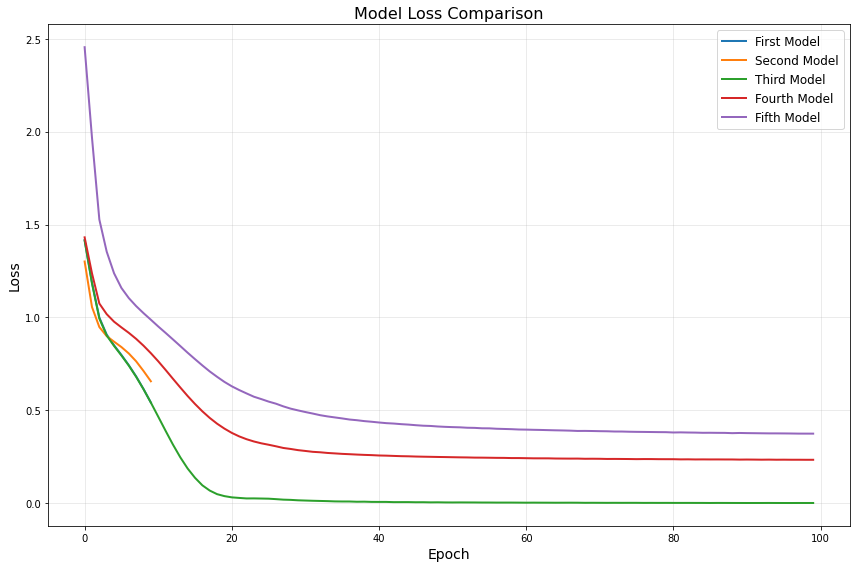

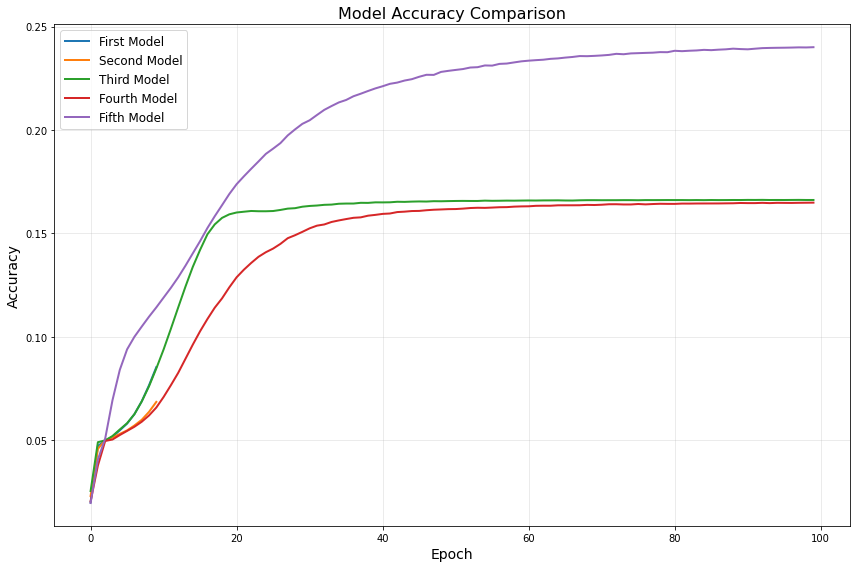

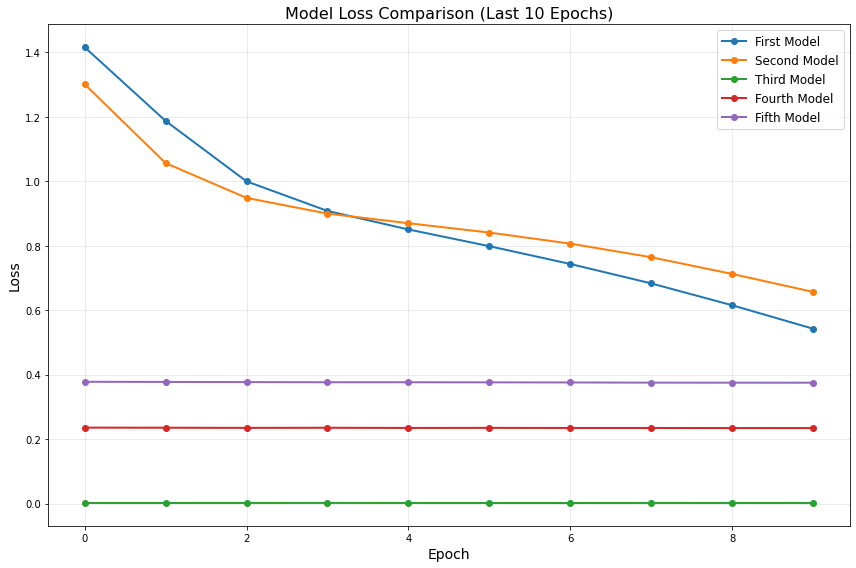

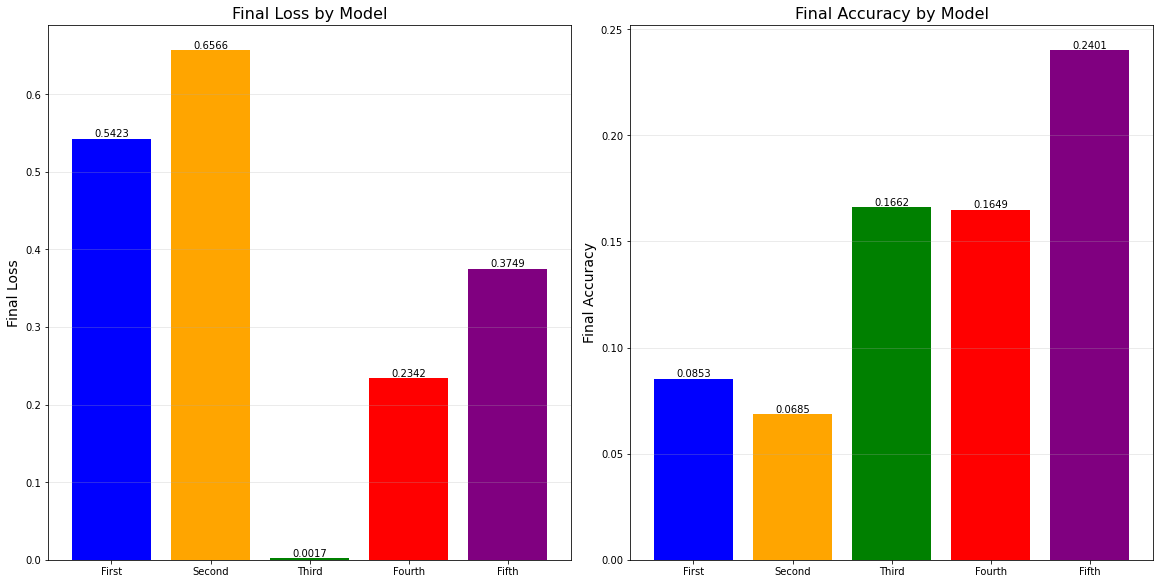

In [26]:
import matplotlib.pyplot as plt

# Í∞Å Î™®Îç∏Ïùò ÌïôÏäµ Í≤∞Í≥ºÎ•º Ï†ÄÏû•ÌñàÎã§Í≥† Í∞ÄÏ†ï
# history1 = model1.fit(...)
# history2 = model2.fit(...)
# ... Îì±ÏúºÎ°ú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï®

# ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú historyÎ•º Ï†ÄÏû•ÌïòÏßÄ ÏïäÏïòÎã§Î©¥, Îã§ÏùåÍ≥º Í∞ôÏù¥ Îã§Ïãú ÌïôÏäµÌïòÎ©¥ÏÑú Ï†ÄÏû•Ìï¥Ïïº Ìï©ÎãàÎã§:
# history1 = model1.fit(dataset, epochs=EPOCHS, verbose=1)
# history2 = model2.fit(dataset, epochs=EPOCHS, verbose=1)
# history3 = model3.fit(dataset, epochs=EPOCHS, verbose=1)
# history4 = model4.fit(dataset, epochs=EPOCHS, verbose=1)
# history5 = model5.fit(dataset, epochs=EPOCHS, verbose=1)

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(12, 8))

# Í∞Å Î™®Îç∏Ïùò loss Í∑∏ÎûòÌîÑ Ï∂îÍ∞Ä (historyÍ∞Ä ÏûàÎã§Í≥† Í∞ÄÏ†ï)
plt.plot(history1.history['loss'], label='First Model', linewidth=2)
plt.plot(history2.history['loss'], label='Second Model', linewidth=2)
plt.plot(history3.history['loss'], label='Third Model', linewidth=2)
plt.plot(history4.history['loss'], label='Fourth Model', linewidth=2)
plt.plot(history5.history['loss'], label='Fifth Model', linewidth=2)

plt.title('Model Loss Comparison', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Ï∂îÍ∞ÄÎ°ú accuracy Í∑∏ÎûòÌîÑÎèÑ Í∑∏Î¶¨Í≥† Ïã∂Îã§Î©¥
plt.figure(figsize=(12, 8))

plt.plot(history1.history['accuracy'], label='First Model', linewidth=2)
plt.plot(history2.history['accuracy'], label='Second Model', linewidth=2)
plt.plot(history3.history['accuracy'], label='Third Model', linewidth=2)
plt.plot(history4.history['accuracy'], label='Fourth Model', linewidth=2)
plt.plot(history5.history['accuracy'], label='Fifth Model', linewidth=2)

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Îçî ÏÉÅÏÑ∏Ìïú Î∂ÑÏÑùÏùÑ ÏúÑÌï¥ ÎßàÏßÄÎßâ 10 epochÏóê ÎåÄÌïú ÌôïÎåÄ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 8))

for history, model_name in zip([history1, history2, history3, history4, history5], 
                              ['First', 'Second', 'Third', 'Fourth', 'Fifth']):
    loss_values = history.history['loss'][-10:]  # ÎßàÏßÄÎßâ 10 epoch
    epochs = range(len(loss_values))
    plt.plot(epochs, loss_values, label=f'{model_name} Model', marker='o', linewidth=2)

plt.title('Model Loss Comparison (Last 10 Epochs)', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Í∞Å Î™®Îç∏Ïùò ÏµúÏ¢Ö ÏÑ±Îä• ÎπÑÍµêÎ•º ÏúÑÌïú ÎßâÎåÄ Í∑∏ÎûòÌîÑ
final_losses = [history1.history['loss'][-1], 
                history2.history['loss'][-1],
                history3.history['loss'][-1],
                history4.history['loss'][-1],
                history5.history['loss'][-1]]

final_accuracies = [history1.history['accuracy'][-1],
                    history2.history['accuracy'][-1],
                    history3.history['accuracy'][-1],
                    history4.history['accuracy'][-1],
                    history5.history['accuracy'][-1]]

model_names = ['First', 'Second', 'Third', 'Fourth', 'Fifth']

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), constrained_layout=True)

# Loss ÎßâÎåÄ Í∑∏ÎûòÌîÑ
bars1 = ax1.bar(model_names, final_losses, color=['blue', 'orange', 'green', 'red', 'purple'])
ax1.set_ylabel('Final Loss', fontsize=14)
ax1.set_title('Final Loss by Model', fontsize=16)
ax1.grid(axis='y', alpha=0.3)

# Accuracy ÎßâÎåÄ Í∑∏ÎûòÌîÑ
bars2 = ax2.bar(model_names, final_accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
ax2.set_ylabel('Final Accuracy', fontsize=14)
ax2.set_title('Final Accuracy by Model', fontsize=16)
ax2.grid(axis='y', alpha=0.3)

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom')

plt.show()

#### ÌöåÍ≥†
---
- ÌïúÍµ≠Ïñ¥ Îç∞Ïù¥ÌÑ∞Îäî ÎÇ¥Î∂Ä Îã®Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏù∏ SubwordTextEncoderÎ•º Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÎ≥¥Îã® ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÏùÑ Ìï¥Ïïº ÌïúÎã§.
- Í∑∏Î†áÎã§Í≥† Ìï¥ÏÑú Ï°∞ÏÇ¨ Í∞ôÏùÄ ÏöîÏÜåÎì§Ïù¥ ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§òÏÑú Ï†ïÌôïÎèÑ Ï∞®Ïù¥Í∞Ä ÌÅ¨ÏßÑ ÏïäÎã§.
- Îã§ÏùåÏóî Îçî Ï¢ãÏùÄ Í≤∞Í≥ºÎ•º ÏúÑÌï¥ Î≥¥Îã§ ÌÅ∞ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î°ú trainÌïòÍ≥† Ïã∂Îã§.